## Inventory control with threshold - all in python scripts. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv('inv_to_ratio.csv')

In [3]:
df.rename(columns={'Type':'product'}, inplace=True)

In [4]:
df.columns = [i.lower() for i in df.columns]

In [5]:
df.replace({'baby sit':'silicon', 'floor mat': 'wall c', 'trunk bag': 'acoustic mat'}, inplace=True)

In [6]:
df.head()

,week,product,inv,cogs
0,1,silicon,35,15
1,1,wall c,30,14
2,1,acoustic mat,40,8
3,2,silicon,20,10
4,2,wall c,16,9


## Inventory Turnover Alert

In [7]:
# iterate on the column 'product'
# alert on inventory turnover ratio

inv_to_threshold = 3
bs_cogs, fm_cogs, tb_cogs = list(), list(), list()

for k,i in enumerate (df['product']):
    if df.loc[k,'product']=='silicon':
        bs_cogs.append(df.loc[k,'cogs'])
    elif df.loc[k,'product']=='wall c':
        fm_cogs.append(df.loc[k,'cogs'])
    elif df.loc[k,'product']=='acoustic mat':
        tb_cogs.append(df.loc[k,'cogs'])
        
silicon_ratio = sum(bs_cogs)/np.mean([df.loc[0,'inv'],df.loc[33,'inv']])
wall_c_ratio = sum(fm_cogs)/np.mean([df.loc[1,'inv'],df.loc[34,'inv']])
acoustic_mat_ratio = sum(tb_cogs)/np.mean([df.loc[2,'inv'],df.loc[35,'inv']])

inv_ratio = pd.DataFrame({'inventory_turnover_ratio': [silicon_ratio, wall_c_ratio, acoustic_mat_ratio]},
                         index=['silicon_ratio','wall_c_ratio','acoustic_mat_ratio'])

for e, j in enumerate (inv_ratio['inventory_turnover_ratio']):
    if j <= inv_to_threshold :
        print(f"{inv_ratio.index[e]} has inventory turnover ratio of {j:.2f}, below benchmark of {inv_to_threshold}")
        


acoustic_mat_ratio has inventory turnover ratio of 2.71, below benchmark of 3


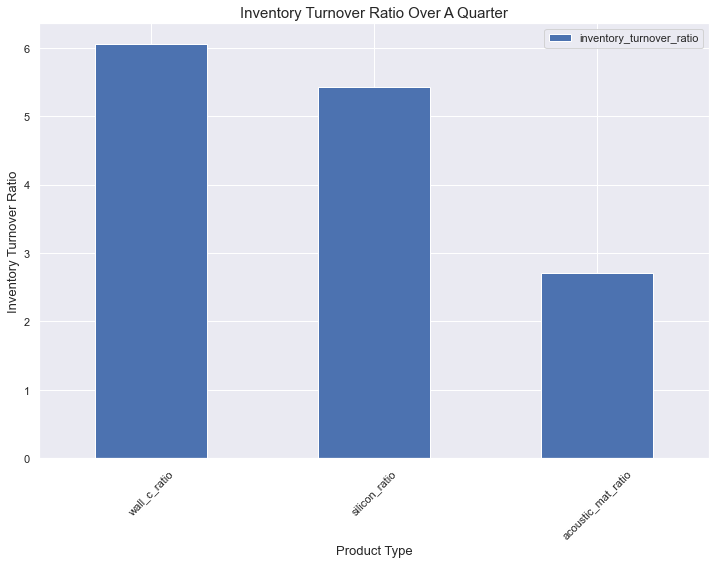

In [8]:
# display inventory turnover ratio

inv_ratio = inv_ratio.sort_values('inventory_turnover_ratio', ascending=False)
inv_ratio.plot.bar(figsize=(12,8))
plt.title('Inventory Turnover Ratio Over A Quarter', fontsize=15)
plt.xlabel('Product Type', fontsize=13)
plt.ylabel('Inventory Turnover Ratio', fontsize=13);
plt.xticks(rotation=45);

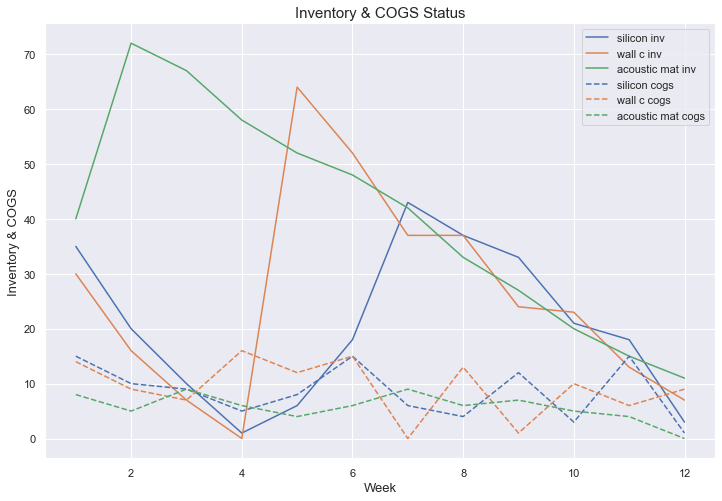

In [9]:
# inventory status

plt.figure(figsize=(12,8))

ax = sns.lineplot(data=df, x='week', y='inv', hue='product')
ax = sns.lineplot(data=df, x='week', y='cogs', hue='product', linestyle='--')

plt.legend(['silicon inv', 'wall c inv', 'acoustic mat inv', 'silicon cogs', 'wall c cogs', 'acoustic mat cogs'])
plt.xlabel('Week', fontsize=13)
plt.ylabel('Inventory & COGS', fontsize=13)
plt.title('Inventory & COGS Status', fontsize=15)

style = ax.get_legend()
style_line = style.get_lines()
for i in range(3,6):
    style_line[i].set_linestyle('--')